In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import openMindednessFunctions as omf
import seaborn as sns

In [110]:
hyp = pd.read_csv('OMdata_h.csv')
net = pd.read_csv('datasets/in/OMdata.csv')

In [111]:
hyp = hyp.drop(labels='Unnamed: 0', axis='columns')
net = net.drop(labels='Unnamed: 0', axis='columns')

In [112]:
len(hyp)

2108

In [113]:
len(net)

2108

# Plots for politics dataset

In [114]:
import os
import re
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
from cycler import cycler


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('mode.chained_assignment', None)

In [115]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.size'] = 20
rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'
rcParams['figure.figsize'] = (10,6)

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

navy = (56 / 256, 74 / 256, 143 / 256)
teal = (106 / 256, 197 / 256, 179 / 256)
pink = [199 / 255, 99 / 255, 150 / 255]
rcParams['axes.prop_cycle'] = cycler(color=['tab:blue', 'tab:green', 'tab:red'])

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

In [116]:
hyp = hyp.rename(columns={'date':'timestamp'})
# net = net.rename(columns={'date':'timestamp'})

In [106]:
# import seaborn as sns
# palette = {
#     'Democrat': 'tab:blue',
#     'Moderate': 'tab:green',
#     'Republican': 'tab:red',
# }
# # sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})

# for dataset in sorted(hyp.dataset.unique()):
#     print(dataset)
#     data = hyp[hyp['dataset']==dataset]
#     fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharey=True)
#     i = 0
#     j = 0
#     for timestamp in list(data.timestamp.unique()):
#         tmp = data[data['timestamp']==timestamp]
#         g = sns.histplot(data=tmp, x='opt', hue='orientation', palette=palette, ax=axes[i, j], alpha=0.2, stat='percent', common_norm=False, kde=True, line_kws={'linewidth':5})
#         g.set_ylabel("% Users", fontsize = 15)
#         g.set_xlabel("Opinion", fontsize = 15)
#     #     g.set_title(f'{labels[i,j]}', fontsize = 15)
#         g.set_xlim(-0.1, 1.0)
#     #     g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
#         # yticklabels = g.get_yticks()
#         # g.set_yticklabels(labels = yticklabels, fontsize=15)
#         plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
#         plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
#         plt.subplots_adjust(hspace=0.5)
#         if j < 1 or i > 0:
#             g.legend_.remove()
#         else:
#             axes[i,j].legend_.set_title("Leaning")
#         j += 1
#         if j % 2 == 0:
#             i+=1
#             j = 0
#     plt.suptitle(dataset.capitalize())
#     plt.show()
#     plt.close()

In [117]:
net.columns

Index(['timestamp', 'node', 'dataset', 'opt', 'opt1', 'neighbors', 'opChange',
       'homophily', 'orientation', 'neighborsOps', 'error', 'estOp',
       'openMindedness', 'nactiveint', 'orientation-1', 'date'],
      dtype='object')

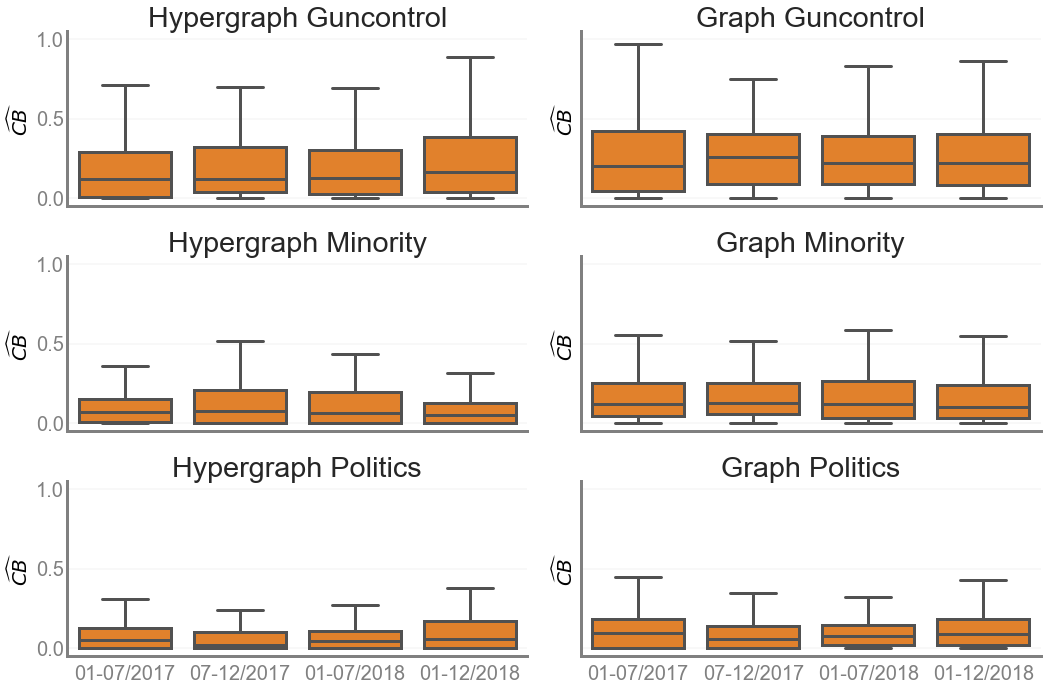

In [128]:
import seaborn as sns
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(15,10))
for i, dataset in enumerate(sorted(hyp.dataset.unique())):
    datah = hyp[hyp['dataset'] == dataset]
    datan = net[net['dataset'] == dataset]
    # sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
    h = sns.boxplot(x="timestamp", y="openMindedness", palette=['tab:orange'],data=datah, ax=ax[i, 0], showfliers=False)
    n = sns.boxplot(x="timestamp", y="openMindedness", palette=['tab:orange'],data=datan, ax=ax[i, 1], showfliers=False)
    ax[i,0].set_xlabel("")
    ax[i,1].set_xlabel("")
    ax[i,0].set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    ax[i,1].set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    ax[i,0].set_xticks(ticks=[0, 1, 2, 3])
    ax[i,1].set_xticks(ticks=[0, 1, 2, 3])
    ax[i,0].set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
    ax[i,1].set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
    ax[i,0].set_ylim(-0.05, 1.05)
    ax[i,1].set_ylim(-0.05, 1.05)
    ax[i,0].set_title(f'Hypergraph {dataset.capitalize()}')
    ax[i,1].set_title(f'Graph {dataset.capitalize()}')
#     g.set_title(dataset.capitalize())
# plt.suptitle("Overall Open-Mindedness Distributions")
plt.tight_layout()
plt.show()
plt.close()
# plt.legend(loc='upper right', title='Leaning')
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'left'})
# g.set_xlim(left=-1.5, right=19.5)

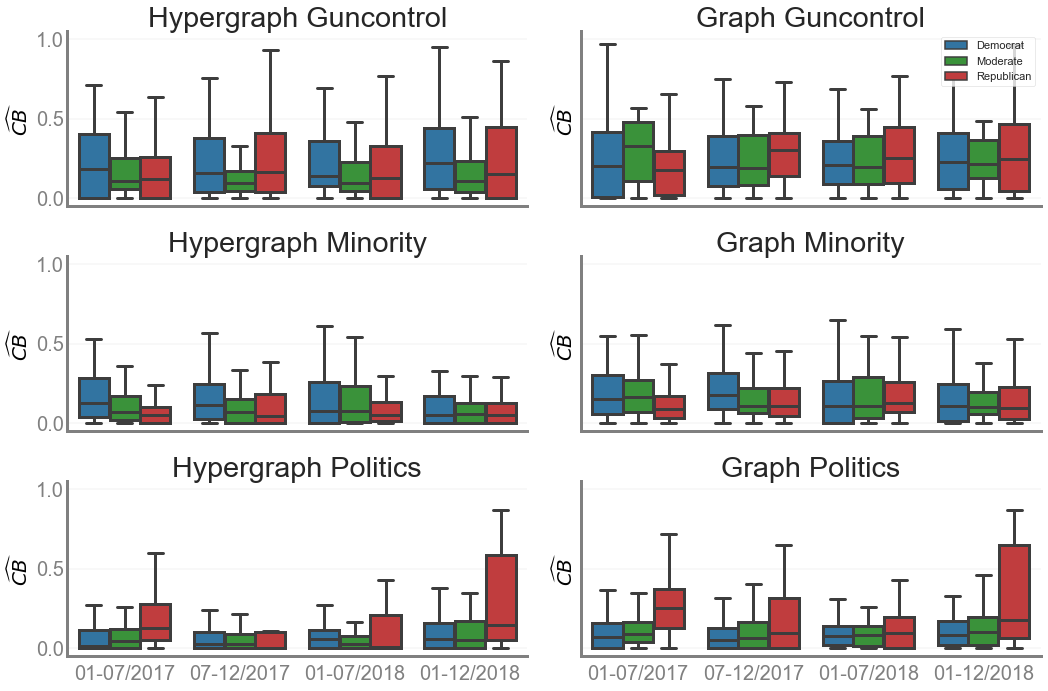

In [137]:
import seaborn as sns
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(15,10))
for i, dataset in enumerate(sorted(hyp.dataset.unique())):
    datah = hyp[hyp['dataset'] == dataset]
    datan = net[net['dataset'] == dataset]
    # sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
    h = sns.boxplot(x="timestamp", y="openMindedness", hue = 'orientation', hue_order = ['Democrat', 'Moderate', 'Republican'], data=datah, ax=ax[i, 0], showfliers=False)
    n = sns.boxplot(x="timestamp", y="openMindedness",  hue = 'orientation', hue_order = ['Democrat', 'Moderate', 'Republican'], data=datan, ax=ax[i, 1], showfliers=False)
    ax[i,0].set_xlabel("")
    ax[i,1].set_xlabel("")
    ax[i,0].set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    ax[i,1].set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    ax[i,0].set_xticks(ticks=[0, 1, 2, 3])
    ax[i,1].set_xticks(ticks=[0, 1, 2, 3])
    ax[i,0].set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
    ax[i,1].set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
    ax[i,0].set_ylim(-0.05, 1.05)
    ax[i,1].set_ylim(-0.05, 1.05)
    ax[i,0].set_title(f'Hypergraph {dataset.capitalize()}')
    ax[i,1].set_title(f'Graph {dataset.capitalize()}')
    ax[i,0].legend_.remove()
    ax[i,1].legend_.remove()
ax[0,1].legend()
ax[0,1].legend_.set_title("Leaning")
ax[0,1].legend(loc='upper right')
#     g.set_title(dataset.capitalize())
# plt.suptitle("Overall Open-Mindedness Distributions")
plt.tight_layout()
plt.show()
plt.close()
# plt.legend(loc='upper right', title='Leaning')
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'left'})
# g.set_xlim(left=-1.5, right=19.5)

In [ ]:
print(data.openMindedness.min())
print(data.openMindedness.max())

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(25,5))
for i, dataset in enumerate(sorted(hyp.dataset.unique())):
    data = hyp[hyp['dataset']==dataset]
    # sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
    g = sns.violinplot(x="timestamp", y="openMindedness", palette=['tab:orange'],data=data, ax=ax[i], cut=0)
    g.set_xlabel("")
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xticks(ticks=[0, 1, 2, 3])
    g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
    g.set_ylim(-0.1, 1.05)
    g.set_title(dataset.capitalize())
plt.suptitle("Overall Open-Mindedness Distributions")
plt.tight_layout()
plt.show()
plt.close()
# plt.legend(loc='upper right', title='Leaning')
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'left'})
# g.set_xlim(left=-1.5, right=19.5)

In [ ]:
hyp.columns

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(30,10))
for i, dataset in enumerate(sorted(hyp.dataset.unique())):
    data = hyp[hyp['dataset']==dataset]
    # sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
    g = sns.boxplot(x="timestamp", y="openMindedness", hue='orientation', data=data, ax=ax[i])
    g.set_xlabel("")
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xticks(ticks=[0, 1, 2, 3])
    g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
    g.set_ylim(-0.05, 1.05)
    g.set_title(dataset.capitalize())
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.set_title("Leaning")
ax[2].legend(loc='upper right', fontsize=20)

plt.suptitle("Open-Mindedness Distributions")
plt.tight_layout()
plt.show()
plt.close()
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'left'})
# g.set_xlim(left=-1.5, right=19.5)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(30,7))
for i, dataset in enumerate(sorted(hyp.dataset.unique())):
    data = hyp[hyp['dataset']==dataset]
    # sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
    g = sns.violinplot(x="timestamp", y="openMindedness", hue='orientation', data=data, ax=ax[i], cut=0, density_norm = 'count')
    g.set_xlabel("")
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xticks(ticks=[0, 1, 2, 3])
    g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
    g.set_ylim(-0.05, 1.05)
    g.set_title(dataset.capitalize())
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.set_title("Leaning")
ax[2].legend(loc='upper right')

plt.suptitle("Open-Mindedness Distributions")
plt.tight_layout()
plt.show()
plt.close()
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'left'})
# g.set_xlim(left=-1.5, right=19.5)


In [ ]:
sns.set()
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(17,5))
g = sns.violinplot(x="timestamp", y="openMindedness", data=data[data['orientation']=='Democrat'], palette=['b'], alpha=0.6, linewidth=1.8, ax=ax, cut=0)
g.set_xlabel("")
g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
g.set_xticks(ticks=[0, 1, 2, 3])
g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
g.set_ylim(-0.05, 1.0)

# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'center'})
# g.set_xlim(left=-1.5, right=19.5)

# sns.set()
# sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
# fig, ax = plt.subplots(figsize=(17,5))
# g = sns.violinplot(x="date", y="CB", data=data[data['leaning']=='Democrat'], palette=['b'], alpha=0.6, linewidth=1.8, ax=ax)
# g.set_xlabel("")
# g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
# g.set_xticks(ticks=[0, 1, 2, 3])
# g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
# g.set_ylim(0.0, 1.0)
# # g.set_xticks(ticks=[0,5,11,17])
# # g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'center'})
# # g.set_xlim(left=-1.5, right=19.5)

In [ ]:
sns.set()
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(17,5))
g = sns.violinplot(x="timestamp", y="openMindedness", data=data[data['orientation']=='Republican'], palette=['r'], alpha=0.6, linewidth=1.8, ax=ax, cut=0)
g.set_xlabel("")
g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
g.set_xticks(ticks=[0, 1, 2, 3])
g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
g.set_ylim(-0.05, 1.05)

# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'center'})
# g.set_xlim(left=-1.5, right=19.5)

# sns.set()
# sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
# fig, ax = plt.subplots(figsize=(17,5))
# g = sns.violinplot(x="date", y="CB", data=data[data['leaning']=='Republican'], palette=['r'], alpha=0.6, linewidth=1.8, ax=ax)
# g.set_xlabel("")
# g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
# g.set_xticks(ticks=[0, 1, 2, 3])
# g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
# g.set_ylim(0.0, 1.0)
# # g.set_xticks(ticks=[0,5,11,17])
# # g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'center'})
# # g.set_xlim(left=-1.5, right=19.5)

In [ ]:
sns.set()
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(17,5))
g = sns.violinplot(x="timestamp", y="openMindedness", data=data[data['orientation']=='Moderate'], palette=['g'], alpha=0.6, linewidth=1.8, ax=ax, cut=0)
g.set_xlabel("")
g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
g.set_xticks(ticks=[0, 1, 2, 3])
g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
g.set_ylim(-0.05, 1.0)
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'center'})
# g.set_xlim(left=-1.5, right=19.5)

# sns.set()
# sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
# fig, ax = plt.subplots(figsize=(10,5))
# g = sns.violinplot(x="date", y="CB", data=data[data['leaning']=='Moderate'], palette=['g'], linewidth=1.8, ax=ax)
# g.set_xlabel("")
# g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
# g.set_xticks(ticks=[0, 1, 2, 3])
# g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
# g.set_ylim(0.0, 1.0)
# # g.set_xticks(ticks=[0,5,11,17])
# # g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'center'})
# # g.set_xlim(left=-1.5, right=19.5)

In [ ]:
import numpy as np
labels=np.array([['01-07/2017', '07-12/2017'], ['01-07/2018', '01-12/2018']])

In [ ]:
import seaborn as sns
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.histplot(bins=10, data=tmp, x='openMindedness', hue='orientation', palette=palette, ax=axes[i, j], alpha=0.5, stat='percent', common_norm=False, kde=True)
    g.set_ylabel("% Users", fontsize = 15)
    g.set_xlabel(r"$\widehat{CB}$", fontsize = 15)
    g.set_title(f'{labels[i,j]}', fontsize = 15)
    g.set_xlim(-0.1, 1.0)
#     g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.5)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

# Statistical tests

In [ ]:
data

In [ ]:
cols = pd.MultiIndex.from_tuples([("Dem vs. Rep", "ks-stat"), 
                                  ("Dem vs. Neutr", "ks-stat"), 
                                  ("Rep vs. Neutr", "ks-stat"),
                                  ("Dem vs. Rep", "p-value"), 
                                  ("Dem vs. Neutr", "p-value"), 
                                  ("Rep vs. Neutr", "p-value")])
timestamps = [(time) for time in list(data.timestamp.unique())]
multi_index = pd.Index(timestamps)
stattest_df = pd.DataFrame(columns=cols,index=multi_index)



In [ ]:
from scipy.stats import ks_2samp
for timestamp in list(data.timestamp.unique()):
    # to_append = []
    # print(timestamp)
    tmp = data[data['timestamp']==timestamp]
    tmp = tmp[['openMindedness','orientation']]
    leanings = list(tmp.orientation.unique())
    d_data = {grp:tmp['openMindedness'][tmp.orientation == grp] for grp in leanings}
    stat, p = ks_2samp(d_data['Democrat'], d_data['Republican'], alternative='two-sided', mode='auto')
    alpha = 0.05
    print(f'Comparing Democrat and Moderate distribution at time {timestamp}')
    print('Statistics=%.10f, p=%.20f' % (stat, p))
    stattest_df.loc[timestamp][('Dem vs. Rep', 'ks-stat')] = stat
    stattest_df.loc[timestamp][('Dem vs. Rep', 'p-value')] = p
    # to_append.append(stat, p)
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    stat, p = ks_2samp(d_data['Democrat'], d_data['Moderate'], alternative='two-sided', mode='auto')
    alpha = 0.05
    print(f'Comparing Democrat and Moderate distribution at time {timestamp}')
    print('Statistics=%.10f, p=%.20f' % (stat, p))
    stattest_df.loc[timestamp][('Dem vs. Neutr', 'ks-stat')] = stat
    stattest_df.loc[timestamp][('Dem vs. Neutr', 'p-value')] = p
    # to_append.append(stat, p)
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    stat, p = ks_2samp(d_data['Republican'], d_data['Moderate'], alternative='two-sided', mode='auto')
    alpha = 0.05
    print(f'Comparing Republican and Moderate distribution at time {timestamp}')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    stattest_df.loc[timestamp][('Rep vs. Neutr', 'ks-stat')] = stat
    stattest_df.loc[timestamp][('Rep vs. Neutr', 'p-value')] = p
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    # data.append(to_append)

In [ ]:
stattest_df

In [ ]:
from scipy.stats import ks_2samp
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    tmp = tmp[['openMindedness','orientation']]
    leanings = list(tmp.orientation.unique())
    d_data = {grp:tmp['openMindedness'][tmp.orientation == grp] for grp in leanings}
    stat, p = ks_2samp(d_data['Democrat'], d_data['Republican'], alternative='less', mode='auto')
    alpha = 0.05
    if p > alpha:
        print(f'Comparing Republican and Moderate distribution at time {timestamp}')
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print('Same distributions (fail to reject H0)')
    stat, p = ks_2samp(d_data['Democrat'], d_data['Moderate'], alternative='less', mode='auto')
    alpha = 0.05
    if p > alpha:
        print(f'Comparing Republican and Moderate distribution at time {timestamp}')
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print('Same distributions (fail to reject H0)')
    stat, p = ks_2samp(d_data['Republican'], d_data['Moderate'], alternative='less', mode='auto')
    alpha = 0.05
    if p > alpha:
        print(f'Comparing Republican and Moderate distribution at time {timestamp}')
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print('Same distributions (fail to reject H0)')

# Analisi stabilità OpenMindedness

### Standard deviation

In [ ]:
grouped = data.groupby(['node'], as_index=False).agg({'openMindedness':['mean', 'std']})
grouped = grouped.dropna(subset=[('openMindedness', 'std')])
grouped.reset_index()
grouped.head()

In [ ]:
newdf = pd.DataFrame()
newdf['node'] = grouped[(   'node',     '')]
newdf['mean_eps'] = grouped[('openMindedness', 'mean')]
newdf['mean_std'] = grouped[('openMindedness', 'std')]
newdf.head()

In [ ]:
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(8,4))
g = sns.histplot(data=newdf, x='mean_std', bins=20, kde=True, ax=ax, alpha=1.0, stat='probability')
g.set_ylabel("% Users", fontsize = 20)
g.set_xlabel(r"$\widehat{CB}$ user-level standard deviation", fontsize = 20)

# Distributions

In [ ]:
g = sns.scatterplot(data=data[data['openMindedness']>0], x='openMindedness', y='opt', alpha=0.5, color='b')
g.set_xlabel(r"$\widehat{CB}$", fontsize = 20)
g.set_ylabel("Opinion (t)")

In [ ]:
g = sns.scatterplot(data=data[data['openMindedness']>0], x='openMindedness', y='opt1', alpha=0.8, color='b')
g.set_xlabel(r"$\widehat{CB}$", fontsize = 20)
g.set_ylabel("Opinion (t+1)")

In [ ]:
import seaborn as sns
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    # g = sns.histplot(data=tmp, x='opt', kde=True, bins=30, hue='orientation', palette=palette, alpha=0.2, ax=axes[i, j], stat='probability', common_norm=False)
    g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins='auto', ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("% Users", fontsize = 15)
    g.set_xlabel(r"Leaning", fontsize = 15)
    g.set_title(f'{labels[i,j]}', fontsize = 15)
    g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    for rectangle in g.patches:
        if rectangle.get_x() < 0.4:
            rectangle.set_facecolor('tab:blue')
        elif rectangle.get_x() > 0.6:
            rectangle.set_facecolor('tab:red')
        else:
            rectangle.set_facecolor('tab:green')
    plt.subplots_adjust(hspace=0.5)

    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

## Error distribution log scale

In [ ]:
data.columns

In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.histplot(data=tmp, x='error', kde=True, bins=30, hue='orientation', palette=palette, alpha=0.2, ax=axes[i, j], stat='probability', common_norm=False)
    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("% Users", fontsize = 15)
    g.set_xlabel(r"Estimation error", fontsize = 15)
    g.set_title(f'{labels[i,j]}', fontsize = 15)
#     g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.5)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

## Error logscale distribution

In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
i = 0
j = 0

for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.histplot(data=tmp, x='error', kde=True, bins=30, hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.2, ax=axes[i, j], stat='probability', common_norm=False)
    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("% Users", fontsize = 15)
    g.set_xlabel(r"Error (log)", fontsize = 15)
    g.set_title(f'{labels[i,j]}', fontsize = 15)
    g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=1.0)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

In [ ]:
data.error.mean()

# Mean values and standard deviations

In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
for attribute in ['openMindedness']:
    fig, axes = plt.subplots(figsize=(12, 3), dpi=600, nrows=1, ncols=2, sharey = True)

    f = sns.lineplot(x="timestamp", y=attribute, data=data, ax=axes[0])
#     f.set_xticks(ticks=[0,5,11,17])
#     f.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'right'})
#     f.set_xlim(left=-1.5, right=23.5)
    f.set_xlabel("")
    f.set_xticks(ticks=[0, 1, 2, 3])
    f.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})

    g = sns.lineplot(x="timestamp", y=attribute, data=data, hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], ax = axes[1], palette=palette)
#     g.set_xticks(ticks=[0,5,11,17])
#     g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'right'})
#     g.set_xlim(left=-1.5, right=23.5)
#     g.set_ylim(bottom=0.0, top=1.0)
    g.set_xlabel("")
#     g.set_xticks(ticks=[0, 1, 2, 3])
#     g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})

    fig.suptitle(f'{attribute}: mean (overall and by political leaning)')
    
    plt.show()

In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
for attribute in ['homophily']:
    fig, axes = plt.subplots(figsize=(12, 3), dpi=600, nrows=1, ncols=2, sharey = True)

    f = sns.lineplot(x="timestamp", y=attribute, data=data, ax=axes[0])
#     f.set_xticks(ticks=[0,5,11,17])
#     f.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'right'})
#     f.set_xlim(left=-1.5, right=23.5)
    f.set_xlabel("")
    f.set_xticks(ticks=[0, 1, 2, 3])
    f.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})

    g = sns.lineplot(x="timestamp", y=attribute, data=data, hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], ax = axes[1], palette=palette)
#     g.set_xticks(ticks=[0,5,11,17])
#     g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'right'})
#     g.set_xlim(left=-1.5, right=23.5)
#     g.set_ylim(bottom=0.0, top=1.0)
    g.set_xlabel("")
#     g.set_xticks(ticks=[0, 1, 2, 3])
#     g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})

    fig.suptitle(f'{attribute}: mean (overall and by political leaning)')
    
    plt.show()

# Scatterplots

In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}

In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xlabel("Opinion (t)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt1', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xlabel("Opinion (t+1)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning (t)")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opChange', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xlabel("Opinion change")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()


In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt', y = 'opChange', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("Opinion change")
    g.set_xlabel("Opinion (t)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()


In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt1', y = 'opChange', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("Opinion change")
    g.set_xlabel("Opinion (t+1)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning (t)")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

In [ ]:
data.columns

In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='homophily', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.2, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("open mindedness")
    g.set_xlabel("homophily")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning (t)")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

In [ ]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    tmp = tmp[tmp['homophily']>0]
    tmp = tmp[tmp['openMindedness']>0]
    g = sns.scatterplot(data=tmp, x='homophily', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("open mindedness")
    g.set_xlabel("standard deviation")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

In [ ]:
from scipy.stats import pearsonr
data['openMindedness'].corr(data['homophily'])

In [ ]:
tmp = data[data['openMindedness']>0]
tmp = tmp[tmp['homophily']>0]
tmp['openMindedness'].corr(data['homophily'])